In [3]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
data = pd.read_csv("reddit_worldnews_sentiments_clean.csv")
data.head()

,Title,Num_Comments,Upvotes,Downvotes,Upvote_Ratio,Date_Posted,Flair,Post_Category,Top_Comment_Score,Sentiment_Label
0,An anti-gay Hungarian politician has resigned ...,849,204547,0,0.93,01/12/20 18:15,NaN,Top,7555.0,negative
1,Trump Impeached for Abuse of Power,879,202909,0,0.88,19/12/19 1:23,Trump,Top,5150.0,negative
2,Vladimir Putin's black belt revoked by interna...,798,200149,0,0.89,28/02/22 20:45,NaN,Top,2907.0,neutral
3,"Two weeks before his inauguration, Donald J. T...",914,189352,0,0.84,19/07/18 2:06,NaN,Top,249.0,positive
4,"Queen Elizabeth II has died, Buckingham Palace...",905,189025,0,0.79,08/09/22 17:32,NaN,Top,1.0,negative


In [5]:
title = data["Title"]
title.head()

0    An anti-gay Hungarian politician has resigned ...
1                   Trump Impeached for Abuse of Power
2    Vladimir Putin's black belt revoked by interna...
3    Two weeks before his inauguration, Donald J. T...
4    Queen Elizabeth II has died, Buckingham Palace...
Name: Title, dtype: object

In [6]:
title = title.str.lower().replace('[^\w\s]', '', regex=True)

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [41]:
import numpy as np

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
tdm_array

array([['an', 'antigay', 'hungarian', ..., 0, 0, 0],
       ['trump', 'impeached', 'for', ..., 0, 0, 0],
       ['vladimir', 'putins', 'black', ..., 0, 0, 0],
       ...,
       ['lahore', 'underworld', 'don', ..., 0, 0, 0],
       ['overwhelmed', 'by', 'war', ..., 0, 0, 0],
       ['thousands', 'protest', 'mexican', ..., 0, 0, 0]], dtype=object)

# Notes:
1. tdm_df consists of a term document matrix, the full matrix is present in the csv file called "Term Document Matrix.csv"
2. The heatmap consists of terms for the term document matrix

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data['Title'])

term_doc_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

term_doc_matrix.index = data.index

term_doc_matrix.head(100)

00  000  02  10  100  100k  102  1021  10th  11  12  120  128gb  13  130  137bn  138  13th  14  140  15  150  1500  16  162  168  16s  17  170  176  17th  18  184  1847  187  19  1941  1945  1946  1947  1970  1980s  1982  1984  1989  1b  1st  20  200  2003  2007  2008  2010  2011  2013  2014  2015  2016  2018  2019  202  2020  2021  2022  2023  2024  2025  2026  2050  20tb  21  215  22  23  238  24  240  25  250  251  252bn  26  26tn  27  284  29  299  2nd  30  300  300ft  300m  300th  30million  30yrs  31  31st  32000  33  34  35  36  360  36m  37  38  391  3m  40  400  400kg  41  415  416  420  427  42m  43  432  43m  440  450  46  48  48m  49  4m  4th  50  500  50bn  51  52  53  55  56  57  5billion  5g  5th  60  600  60s  61  64  65  66  660m  682  70  700m  70km  71  715  72  727  728  729  730  731  732  733  734  737  75  751  77  7b  80  800  81  810th  83  84  87  873  874  875  876  877  878  879  880  8th  90  900  911  92  94  95  963  98  99  abandon  abandoned  abandoning  abandons  abbas  abc  abdomen  abducted  abductees  abductions  abdul  abdulbari  abe  ablaze  able  aboard  abolishes  abort  aborted  abortion  about  abrams  abroad  absentia  abu  abuse  abused  abuses  abusing  academic  accepts  access  accessible  accessing  accession  accident  accidental  accidentally  accommodations  accomplished  accord  according  account  accounts  accuracy  accusations  accuse  accused  accuser  accuses  accusing  achieve  achieved  acid  acknowledge  acquiring  acres  across  act  action  active  actively  activist  activists  activities  activity  actress  actual  actually  add  added  adding  address  addressing  adds  aden  adequate  adhd  administration  administrations  admiral  admits  admitted  adopt  adopting  adopts  ads  adults  advanced  advances  advancing  advertisers  advice  advised  adviser  advisor  advocates  afd  aff  affair  affairs  affect  affected  afflicted  afford  affordable  affront  afghan  afghanistan  afraid  africa  african  after  aftermath  afu  again  against  age  aged  agencies  agency  agent  agents  aggravated  aggression  agree  agreed  agreement  agreements  agrees  agricultural  agriculture  ahead  ai  aid  aide  aiding  aim  aims  air  airbus  aircraft  aires  airfield  airlines  airshow  airstrikes  al  alan  alarmed  alarming  alcohol  aldi  alert  alerted  alerts  alexander  alexei  alexey  algorithm  ali  alicante  alisher  alive  all  allegations  allege  alleged  allegedly  alley  alliance  allies  allow  allowed  allowing  allows  ally  almost  alone  along  alongside  alpine  already  also  alternative  always  am  ama  amazon  ambassador  ambulances  ameer  amendment  america  american  americans  amid  amidst  ammo  ammunition  amnesty  among  amongst  amount  amsterdam  an  anaconda  analysis  analysts  analytica  ancient  and  andes  andina  andrew  angela  anger  angry  animals  anne  annexation  annexe  annexed  anniversary  announce  announced  announces  annoyance  annual  anonymous  another  answer  antarctica  anthem  anti  antibodies  antifa  any  anybody  anyone  anything  anyway  ap  apartheid  apologises  apologize  apology  apostasy  app  appalling  apparent  apparently  appeal  appeals  appear  appearance  appears  apple  application  applications  applies  apply  applying  appove  approaches  approval  approve  approved  approves  apps  april  aptn  arab  arabia  archaeological  archive  arctic  ardern  arderns  are  area  areas  arena  argentina  argentine  argue  arizona  arm  armament  armed  armenia  armenian  armenians  arming  armor  armored  arms  army  around  arrange  arrangements  arrest  arrested  arresting  arrests  arrive  arrived  arrives  arsenic  article  artillery  artist  as  ashena  asia  asian  ask  asked  asking  asks  assange  assassinated  assassination  assassins  assault  assaulted  assemble  assemblies  assembly  assertiveness  asserts  assessment  asset  assets  assist  assistance  assisted  associate  associated  associ

In [15]:
term_doc_matrix.to_csv("Term Document Index.csv", index=False)

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

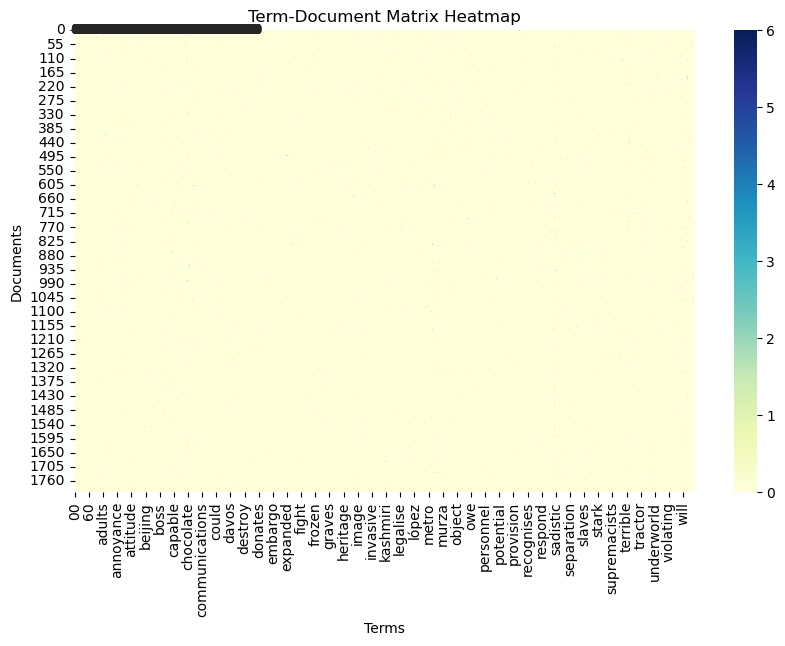

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(term_doc_matrix, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Term-Document Matrix Heatmap')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.show()